In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [109]:
data = pd.read_csv('dengue.csv').dropna()
var = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
X = data[var].values
for i in range(len(X[0])):
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

Text(0, 0.5, 'Sum of Square Root Distance')

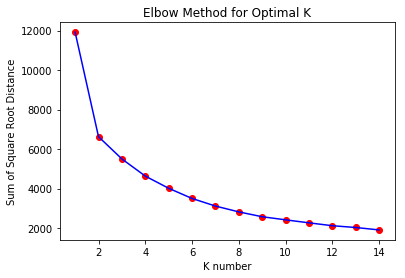

In [68]:
K = range(1,15)
sum_sqr = []
for k in K:
    kg = KMeans(n_clusters=k, random_state=0)
    kg.fit(X)
    sum_sqr.append(kg.inertia_)
#groups = kg.predict(X)
#Xn = kg.transform(X)
#print(Xn)

plt.figure()
plt.scatter(K,sum_sqr,c='red')
plt.plot(K,sum_sqr,c='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('K number')
plt.ylabel('Sum of Square Root Distance')

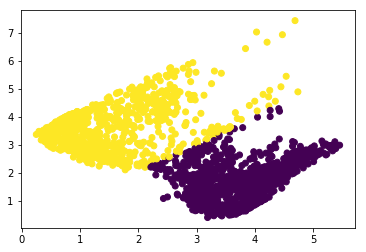

In [110]:
kg = KMeans(n_clusters=2, random_state=0)
kg.fit(X)
groups = kg.predict(X)
L = kg.transform(X)
plt.scatter(L[:,1],L[:,0],c=groups)

In [71]:
print('Mejor numero de clusters es de: 2 (o por lo menos menor a 10)')

Mejor numero de clusters es de: 2 (o por lo menos menor a 10)


In [112]:
#SEGUNDA PARTE
data = pd.read_csv('BreadBasket_DMS.csv').dropna()
var = data.keys()
X = data[var].values
Xn = [] 
product = []
for i in range(len(X)):
    info = []
    date = X[i,0].split('-')
    time = X[i,1].split(':')
    
    info.append(float(date[0]))
    info.append(float(date[1]))
    info.append(float(date[2]))
    info.append(float(time[0])*3600 + float(time[1])*60 + float(time[2]))
    info.append(float(X[i,2]))
    product.append(X[i,3])
    Xn.append(info)
Xn = np.array(Xn, dtype=object)

#Normalizar
for i in range(len(Xn[0])-1):
    Xn[:,i] = (Xn[:,i]-np.mean(Xn[:,i]))/np.std(Xn[:,i])

[-1.2195119672026047 0.8984725305827543 1.6673121042330061
 -1.2045569308910915 1.0]


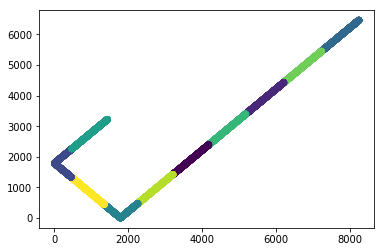

In [114]:
#KMeans
print(Xn[0])
kg = KMeans(n_clusters=10, random_state=0)
kg.fit(Xn)
groups = kg.predict(Xn)
L = kg.transform(Xn)
plt.scatter(L[:,2],L[:,4],c=groups)

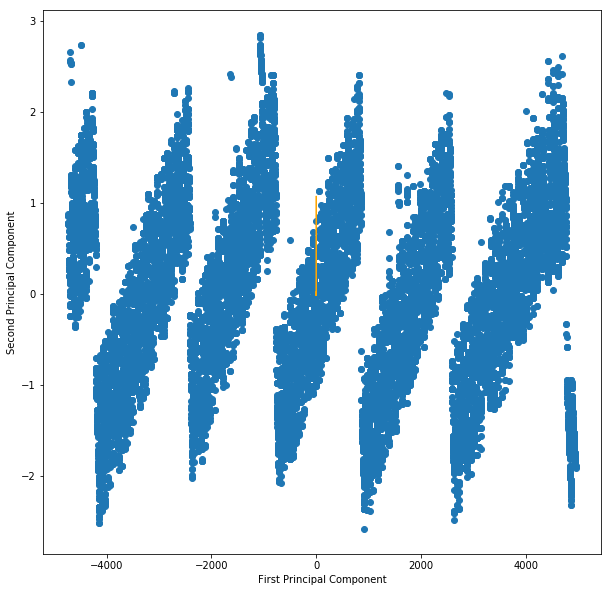

In [106]:
#PCA
pca = PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
          svd_solver='auto', tol=0.0, whiten=False)
pca.fit(Xn)
X_t = pca.transform(Xn)
loads = pca.components_

plt.figure(figsize=(10,10))
plt.scatter(X_t[:,0],X_t[:,1],alpha=1.0)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

for i in range(len(loads[0])):
    plt.arrow(0,0,loads[1,i],-loads[0,i],ec='orange',head_width=0.05)
    #plt.text(loads[0,i],-loads[1,i],names[i],color='orange')
    
#plt.xlim(-3.5,3.5)
#plt.ylim(-3.5,3.5)